In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

path="/Users/jamesdoherty/Documents/Career/Pivigo/Data/Food-and-you/"
plotdir="/Users/jamesdoherty/Documents/Career/Pivigo/Data/Food-and-you/"

pd.set_option('display.max_rows', None)

In [33]:
data = pd.read_csv(path+'Food+and+You+Waves+1-5+Data (3).csv')

# Select Wales region (can consider analysing other regions too)
data_wales = data[data.region_dv.eq(10)]
data_wales = pd.DataFrame(data_wales)

#drop unwanted columns
data_wales_drop = data_wales.drop(['SerialNo', \
                               'psu_dv', 'stratum_all_dv', \
                               'nimd_2010_quintile', 'nimd2017_quintile', \
                               'combinedW1_5weight', \
                               'countryW1_5weight'], 1)

## Choose wave
# wave = [5]
# data_wales = data_wales.loc[data_wales['surveyyear'].isin(wave)]

# Encode 'Not applicable', 'Refused' and 'Don't know' as NaN
data_wales = data_wales.replace([-9, -8, -1, 98], np.nan)
cols = ['q4_1_4', 'q4_1_5a', 'Q4_1_5_comb', 'q4_1_6', 'q4_1_7', 'q4_1_8a', 'q4_1_8b', 'sanspray', 'q4_1_11',
        'q4_1_12', 'q4_1_13', 'q4_1_14', 'q4_1_15', 'q4_1_16', 'q4_1_17', 'q4_1_18', 'q4_1_19']
data_wales[cols] = data_wales[cols].replace([5], np.nan)

# To see hoy many non-NaNs values each column has
print(data_wales.count())

SerialNo              1757
RespSex               1757
age_dv                1029
bhhsize2               540
below6                1027
below16               1755
marstat2              1754
hhdinc                1332
workstat2              540
region_dv             1757
religion_dv           1748
wimd_2014_quintile    1029
nimd_2010_quintile       0
nimd2017_quintile        0
UrbanRuralInd         1757
surveyyear            1757
country_dv            1757
psu_dv                1757
stratum_all_dv        1757
combinedW1_5weight    1757
countryW1_5weight     1757
CkRes                 1029
resfdprp              1029
CkFreq                1029
bcook3                1029
dietary               1757
fdreac_dv             1029
reacalle               196
reacint                196
reaccoe                196
reacnoc                196
reacglu                196
reaclac                196
reaccow                196
reacfpi                196
reacoth                196
reacno                1027
c

In [35]:
#choose sub-sample by commenting in/out

#sex: male == 1; female == 2
# is_sex = data_wales['RespSex'] == [1]
# data_wales = data_wales[is_sex]

#age: 16-24 ==1; 25-34 ==2; 35-44 ==3; 45-54 ==4; 55-64 ==5; 65-74==6; 75+ ==7
# is_age = data_wales['age_dv'] == [1]
# data_wales = data_wales[is_age]

#household income: <10,399 ==1; £10,400-£25,999 ==2; £26,000-£51,999==3; >£52,000==4
# is_income = data_wales['hhdinc'] == [1]
# data_wales = data_wales[is_income]

#working status: in work ==1; retired ==2; other==3
# is_workstat = data_wales['workstat2'] == [1]
# data_wales = data_wales[is_workstat]

#religion: Christian ==1; other relgion ==2; no religion ==3
# is_religion = data_wales['workstat2'] == [1]
# data_wales = data_wales[is_religion]


print(data_wales.shape)

(1757, 502)


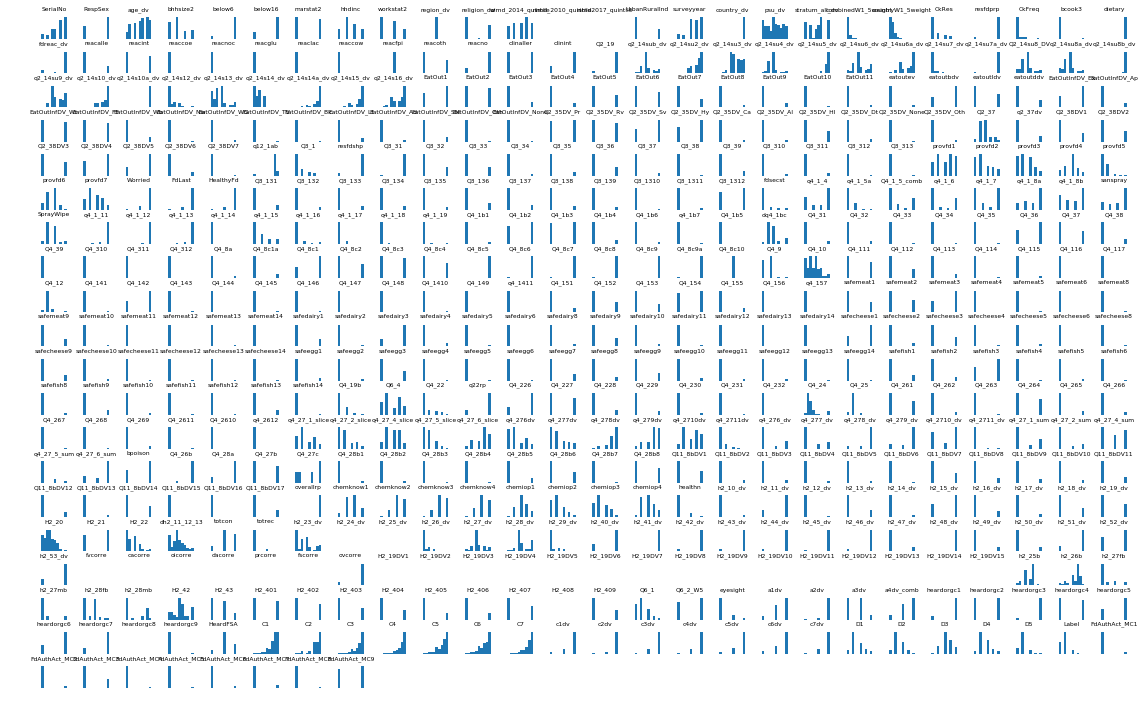

In [34]:
# Loop over all columns, plotting a histogram for each

fig, ax = plt.subplots(figsize = (16, 10))
for n, col in enumerate(data_wales.columns):
    plt.subplot(20, 26, n+1)
    data_wales[col].hist(ax = plt.gca())
    plt.axis('off')
    plt.title(col, fontsize=6)
plt.tight_layout()
plt.savefig('fau_histograms.png', bbox_inches='tight', pad_inches = 0, dpi = 200)

plt.show()